### 一.算法原理
k均值聚类大家都很熟悉了，但可能更多是对算法的迭代过程比较熟悉，这里需要说明一下的就是k均值聚类是有“目标”的，假设给定样本$D=\{x_1,x_2,...,x_m\}$，针对聚类所得簇划分$C=\{C_1,C_2,...,C_k\}$最小化如下的平方误差函数：   

$$
C^*=arg\min_{C}\sum_{i=1}^k\sum_{x\in C_i}\left|\left|x-\mu_i\right|\right|_2^2
$$  

其中，$\mu_i=\frac{1}{|C_i|}\sum_{x\in C_i}x$是簇$C_i$的均值向量，将$m$个样本分到$k$个簇共有$\frac{1}{m!}\sum_{i=1}^m(-1)^iC_m^i(m-i)^k$种可能，显然这是一个NP-hard问题，我们所熟知的k均值算法其实是对这个问题的贪心搜索

### 二.算法流程
>输入：样本集$D=\{x_1,x_2,...,x_m\}$；聚类次数$k$；终止误差$tol$  

>过程   

>（1）从$D$中随机选择$k$个样本作为初始均值向量${\mu_1,\mu_2,...,\mu_k}$   

>（2）重复如下过程，直到终止条件   

>>（2.1）令$C_i=\{\},i=1,2,...,k$；  

>>（2.2）对$j=1,2,...,m$；   

>>>（2.2.1）计算样本$x_j$与各均值向量$\mu_i,i=1,2,...,k$：$d_{ji}=||x_j-\mu_i||_2$；  

>>>（2.2.2）根据距离最近的均值向量确定$x_j$的簇标记：$\lambda_j=arg\min_{i\in \{1,2,...,k\}}d_{ji}$；   

>>>（2.2.3）将样本$x_j$划入相应的簇$C_{\lambda_j}=C_{\lambda_j}\bigcup\{x_j\}$；  

>>（2.3）令$\epsilon=0$，对$i=1,2,...,k$  

>>>（2.3.1）计算新的均值向量：$\mu'_i=\frac{1}{C_i}\sum_{x\in C_i}x$，令$\epsilon=\epsilon+||u_i-u'_i||_2$

>>>（2.3.2）并更新$u_i=u'_i$  

>> （2.4）如果$\epsilon<tol$，则终止循环  

>输出：$C=\{C_1,C_2,...,C_k\}$

In [1]:
"""
kmeans聚类实现，封装到ml_models.cluster
"""

import numpy as np


class KMeans(object):
    def __init__(self, k=3, epochs=100, tol=1e-3, dist_method=None):
        """
        :param k: 聚类簇数量
        :param epochs: 最大迭代次数
        :param tol: 终止条件
        :param dist_method:距离函数，默认欧氏距离
        """
        self.k = k
        self.epochs = epochs
        self.tol = tol
        self.dist_method = dist_method
        if self.dist_method is None:
            self.dist_method = lambda x, y: np.sqrt(np.sum(np.power(x - y, 2)))
        self.cluster_centers_ = {}  # 记录簇中心坐标

    def fit(self, X):
        m = X.shape[0]
        # 初始化
        for idx, data_idx in enumerate(np.random.choice(list(range(m)), self.k, replace=False).tolist()):
            self.cluster_centers_[idx] = X[data_idx]
        # 迭代
        for _ in range(self.epochs):
            C = {}
            for idx in range(self.k):
                C[idx] = []
            for j in range(m):
                best_k = None
                min_dist = np.infty
                for idx in range(self.k):
                    dist = self.dist_method(self.cluster_centers_[idx], X[j])
                    if dist < min_dist:
                        min_dist = dist
                        best_k = idx
                C[best_k].append(j)
            # 更新
            eps = 0
            for idx in range(self.k):
                vec_k = np.mean(X[C[idx]], axis=0)
                eps += self.dist_method(vec_k, self.cluster_centers_[idx])
                self.cluster_centers_[idx] = vec_k
            # 判断终止条件
            if eps < self.tol:
                break

    def predict(self, X):
        m = X.shape[0]
        rst = []
        for i in range(m):
            vec = X[i]
            best_k = None
            min_dist = np.infty
            for idx in range(self.k):
                dist = self.dist_method(self.cluster_centers_[idx], vec)
                if dist < min_dist:
                    min_dist = dist
                    best_k = idx
            rst.append(best_k)
        return np.asarray(rst)

### 四.测试

In [2]:
import os
os.chdir('../')
from ml_models import utils
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.85, random_state=0)
X = X[:, ::-1]

In [3]:
#训练
kmeans = KMeans(k=4)
kmeans.fit(X)

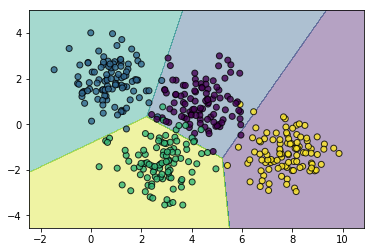

In [4]:
utils.plot_decision_function(X, y, kmeans)
utils.plt.show()